# Árboles de decisión para Regresión

Los árboles de decisión para regresión son modelos predictivos que se utilizan para predecir valores numéricos en función de características de entrada. Aquí hay un resumen del funcionamiento de los árboles de decisión para regresión:

1. **División del Conjunto de Datos:**
   - El árbol comienza con un nodo raíz que representa todo el conjunto de datos.
   - En cada nodo, se selecciona una característica y un umbral para dividir los datos en dos subconjuntos.

2. **Criterio de División:**
   - El criterio de división busca maximizar la reducción en la varianza de los valores de la variable objetivo en los nodos hijos.

3. **Crecimiento del Árbol:**
   - El árbol crece de manera recursiva, dividiendo los nodos en subconjuntos más pequeños hasta que se cumple un criterio de parada (por ejemplo, profundidad máxima del árbol, número mínimo de muestras en un nodo, etc.).

4. **Predicción:**
   - Para hacer una predicción para una nueva observación, se sigue el camino a través del árbol desde la raíz hasta una hoja, y la predicción es el valor medio de los valores de la variable objetivo en esa hoja.

5. **Interpretación:**
   - Los árboles de decisión son fáciles de interpretar visualmente. Puedes trazar el árbol y observar las decisiones en cada nodo.

6. **Manejo de No Linealidades y Interacciones:**
   - Los árboles de decisión pueden capturar relaciones no lineales y complejas en los datos, así como interacciones entre variables predictoras.

7. **Riesgo de Sobreajuste:**
   - Los árboles de decisión pueden ser propensos al sobreajuste, especialmente si no se limita su crecimiento. Técnicas como la poda y la limitación de la profundidad del árbol ayudan a mitigar este riesgo.

8. **Hiperparámetros:**
   - Los árboles de decisión tienen hiperparámetros que afectan su rendimiento, como la profundidad máxima, el número mínimo de muestras en un nodo, etc. La elección adecuada de hiperparámetros es esencial.

9. **Ensemble Learning:**
   - Para mejorar la robustez y generalización, se pueden utilizar métodos de ensamble, como Random Forests, que combinan múltiples árboles de decisión.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Regresión/hormigon.csv")

In [ ]:
descripcion = data.describe(include = "all").T
print(descripcion)

               count        mean         std     min      25%      50%  \
cement        1030.0  281.167864  104.506364  102.00  192.375  272.900   
slag          1030.0   73.895825   86.279342    0.00    0.000   22.000   
ash           1030.0   54.188350   63.997004    0.00    0.000    0.000   
water         1030.0  181.567282   21.354219  121.80  164.900  185.000   
superplastic  1030.0    6.204660    5.973841    0.00    0.000    6.400   
coarseagg     1030.0  972.918932   77.753954  801.00  932.000  968.000   
fineagg       1030.0  773.580485   80.175980  594.00  730.950  779.500   
age           1030.0   45.662136   63.169912    1.00    7.000   28.000   
strength      1030.0   35.817961   16.705742    2.33   23.710   34.445   

                   75%     max  
cement         350.000   540.0  
slag           142.950   359.4  
ash            118.300   200.1  
water          192.000   247.0  
superplastic    10.200    32.2  
coarseagg     1029.400  1145.0  
fineagg        824.000   992

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

## Normalización

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
data_sin_columnas = ss.fit_transform(data)
datos_normalizados = pd.DataFrame(data_sin_columnas, columns = data.columns)

from sklearn.model_selection import train_test_split
y = datos_normalizados['strength']
X = datos_normalizados.drop('strength', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Si no se desea usar datos normalizados ejecutar esta celda para recuperar los originales

In [ ]:
datos_normalizados = data.copy()

In [ ]:
datos_normalizados.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


In [ ]:
# Separar las variables dependiente e independientes
y = datos_normalizados['strength']
X = datos_normalizados.drop('strength', axis=1)

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
# Crear y ajustar el modelo de árbol de decisión para regresión
model = DecisionTreeRegressor(random_state=42)

In [ ]:
"""
model = DecisionTreeRegressor(criterion='squared_error',
                              max_depth=15,
                              max_features=None,
                              max_leaf_nodes=None,
                              min_impurity_decrease=0.0,
                              min_samples_leaf=5,
                              min_samples_split=2,
                              min_weight_fraction_leaf=0.0,
                              random_state=None,
                              splitter='best')
"""

"\nmodel = DecisionTreeRegressor(criterion='squared_error',\n                              max_depth=15,\n                              max_features=None,\n                              max_leaf_nodes=None,\n                              min_impurity_decrease=0.0,\n                              min_samples_leaf=5,\n                              min_samples_split=2,\n                              min_weight_fraction_leaf=0.0,\n                              random_state=None,\n                              splitter='best')\n"

In [ ]:
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

In [ ]:
# Calcular métricas de rendimiento
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
# Imprimir las métricas de rendimiento
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R²): {r2}')

Mean Squared Error (MSE): 30.91651007751938
R-squared (R²): 0.8854349219649174


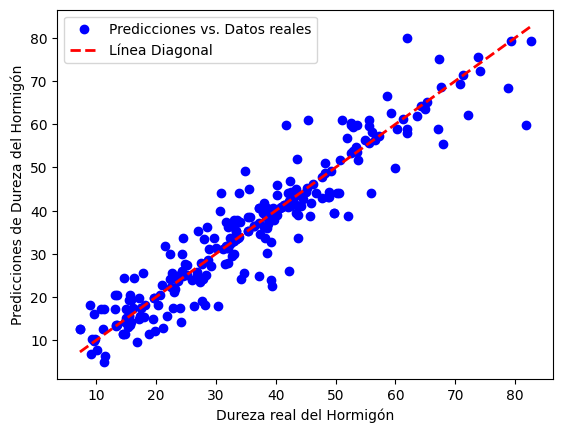

In [ ]:
import matplotlib.pyplot as plt

# Visualizar los resultados
plt.scatter(y_test, y_pred, color='blue', label='Predicciones vs. Datos reales')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Línea Diagonal')
plt.xlabel('Dureza real del Hormigón')
plt.ylabel('Predicciones de Dureza del Hormigón')
plt.legend()
plt.show()